In [1]:
import scanpy, numpy
import matplotlib

# read data

In [2]:
%%time
input_file = '/home/adrian/scratch/zscore.tsv'
adata = scanpy.read_csv(input_file, delimiter='\t')
adata

CPU times: user 44.3 s, sys: 583 ms, total: 44.8 s
Wall time: 44.8 s


AnnData object with n_obs × n_vars = 46490 × 4385

In [3]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

# PCA

In [4]:
scanpy.tl.pca(adata, n_comps=100)

# paga exploration

In [5]:
nei = 5
dist = 0
spre = 10

/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/adrian/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


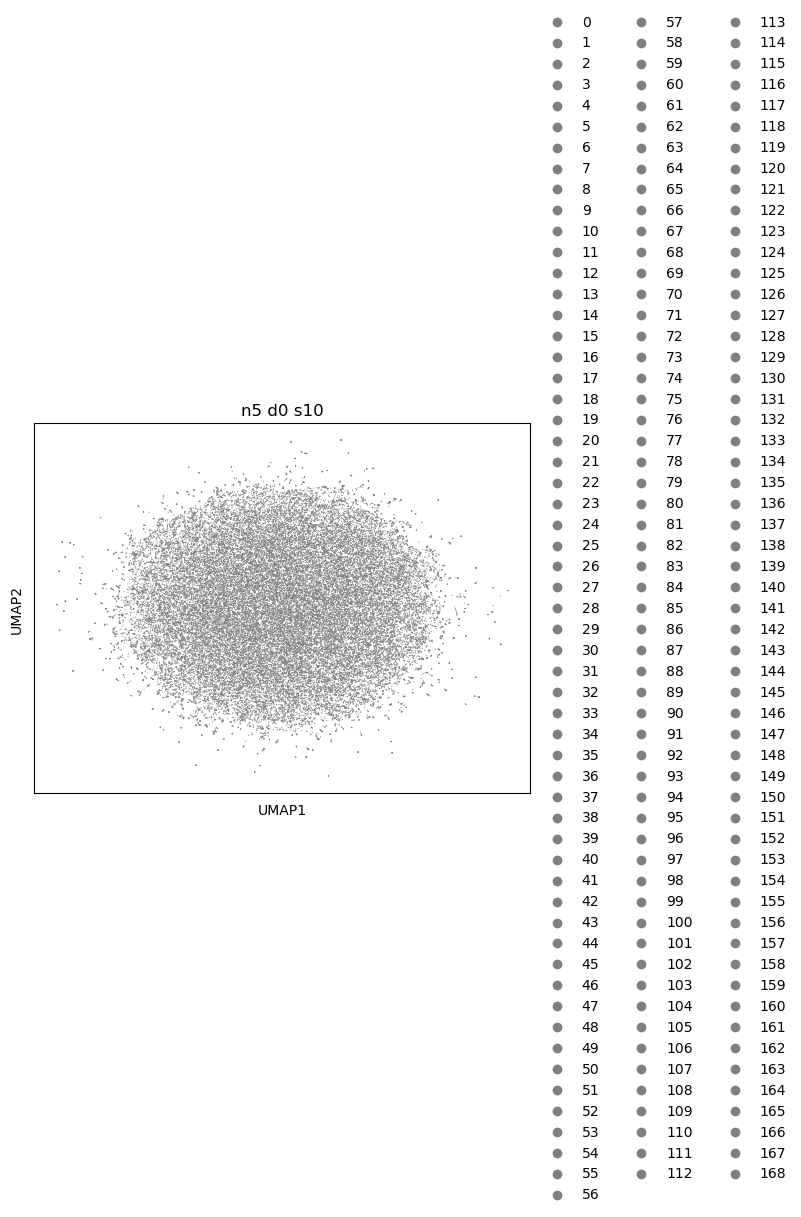

CPU times: user 47.2 s, sys: 1.54 s, total: 48.8 s
Wall time: 24.8 s


In [6]:
%%time

scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
scanpy.tl.umap(adata, min_dist=dist, spread=spre)
scanpy.tl.leiden(adata)
scanpy.pl.umap(adata, color=['leiden'], title='n{} d{} s{}'.format(nei, dist, spre))

# paga

/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


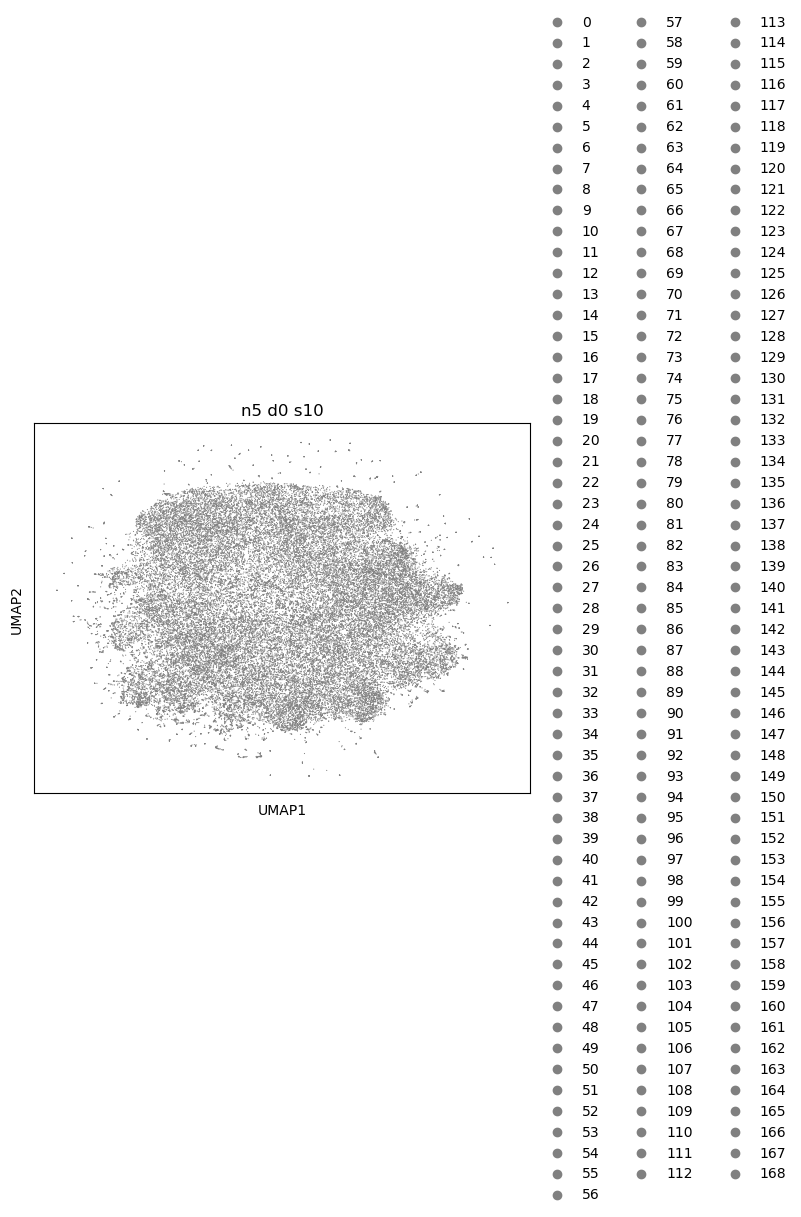

CPU times: user 25.7 s, sys: 1.69 s, total: 27.4 s
Wall time: 22.6 s


In [7]:
%%time

scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)

scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)

scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')
scanpy.tl.leiden(adata)
scanpy.pl.umap(adata, color=['leiden'], title='n{} d{} s{}'.format(nei, dist, spre))